Model je oblika y_hat = Theta0 + Theta1 * x
y_hat =  [0.14219055] + [[0.3225882]] *x


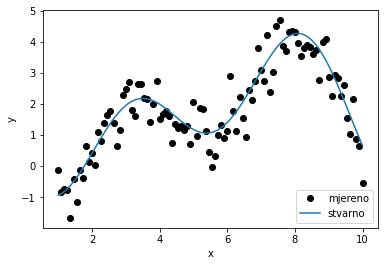

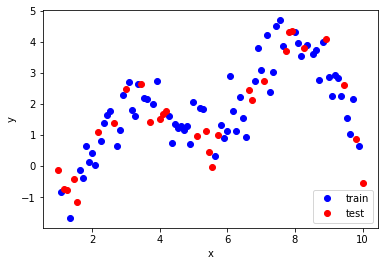

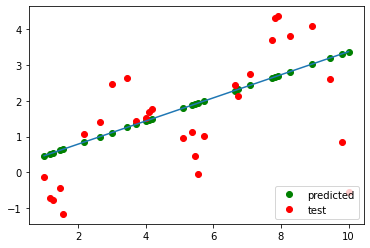

In [2]:
#1

import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error

def non_func(x):
	y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
	return y

def add_noise(y):
    np.random.seed(14)
    varNoise = np.max(y) - np.min(y)
    y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
    return y_noisy

x = np.linspace(1,10,100)
y_true = non_func(x)
y_measured = add_noise(y_true)

plt.figure(1)
plt.plot(x,y_measured,'ok',label='mjereno')
plt.plot(x,y_true,label='stvarno')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 4)

np.random.seed(12)
indeksi = np.random.permutation(len(x))
indeksi_train = indeksi[0:int(np.floor(0.7*len(x)))]
indeksi_test = indeksi[int(np.floor(0.7*len(x)))+1:len(x)]

x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]

xtrain = x[indeksi_train]
ytrain = y_measured[indeksi_train]

xtest = x[indeksi_test]
ytest = y_measured[indeksi_test]

plt.figure(2)
plt.plot(xtrain,ytrain,'ob',label='train')
plt.plot(xtest,ytest,'or',label='test')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 4)

linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)

print('Model je oblika y_hat = Theta0 + Theta1 * x')
print('y_hat = ', linearModel.intercept_, '+', linearModel.coef_, '*x')

ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)

plt.figure(3)
plt.plot(xtest,ytest_p,'og',label='predicted')
plt.plot(xtest,ytest,'or',label='test')
plt.legend(loc = 4)

x_pravac = np.array([1,10])
x_pravac = x_pravac[:, np.newaxis]
y_pravac = linearModel.predict(x_pravac)
plt.plot(x_pravac, y_pravac)


In [3]:
#2 zad

x_train = xtrain
x_train = np.insert(x_train,0,1,axis=1)

def getThetaML(x,y):
    return (np.linalg.inv(np.matrix.transpose(x)@x))@np.matrix.transpose(x)@y
thetaML = getThetaML(x_train,ytrain)
print('Theta0 = ',thetaML[0], '\nTheta1 = ', thetaML[1])
print('y_hat_ML = ', thetaML[0][0], ' + ', thetaML[1][0], 'x')

Theta0 =  [0.14219055] 
Theta1 =  [0.3225882]
y_hat_ML =  0.14219054706711476  +  0.3225881958054343 x


In [5]:
#3 zad

import math
N_STEPS = 1000
def gradijentniSpust(theta, N_STEPS, x, y, alpha):
    for i in range (N_STEPS):
        for j in range (len(theta)):
            theta[j] = theta[j] - alpha*getDeltaJ(theta,x,y,j)
    return theta
    
def getDeltaJ(theta,x,y,j):
    J=0
    for i in range (len(x)):
        J+=(jednPravca(theta, x[i]) - y[i])*x[i,j]
    J /= len(x)
    return J

def jednPravca(theta,x):
    return theta[0] + theta[1]*x[1]

theta_start = [0,0]
alpha = 0.045
theta_gradient = gradijentniSpust(theta_start,N_STEPS,x_train,ytrain,alpha)
print('Theta0 = ', theta_gradient[0][0], ', Theta1= ', theta_gradient[1][0])
print('y_hat_gradient =', theta_gradient[0][0], '+',theta_gradient[1][0],'x')

Theta0 =  0.1421589036184067 , Theta1=  0.3225928720406577
y_hat_gradient = 0.1421589036184067 + 0.3225928720406577 x


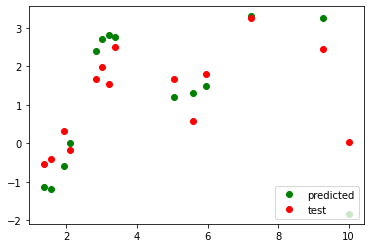

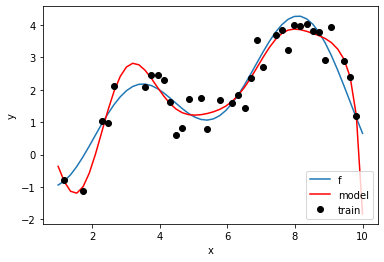

In [6]:
#4 zad

import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

def non_func(x):
    y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
    return y

def add_noise(y):
    np.random.seed(14)
    varNoise = np.max(y) - np.min(y)
    y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
    return y_noisy
 
x = np.linspace(1,10,50)
y_true = non_func(x)
y_measured = add_noise(y_true)

x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]

# make polynomial features
poly = PolynomialFeatures(degree=15)
xnew = poly.fit_transform(x)
    
np.random.seed(12)
indeksi = np.random.permutation(len(xnew))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew)))+1:len(xnew)]

xtrain = xnew[indeksi_train,]
ytrain = y_measured[indeksi_train]

xtest = xnew[indeksi_test,]
ytest = y_measured[indeksi_test]

linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)

ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)

plt.figure(1)
plt.plot(xtest[:,1],ytest_p,'og',label='predicted')
plt.plot(xtest[:,1],ytest,'or',label='test')
plt.legend(loc = 4)

#pozadinska funkcija vs model
plt.figure(2)
plt.plot(x,y_true,label='f')
plt.plot(x, linearModel.predict(xnew),'r-',label='model')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xtrain[:,1],ytrain,'ok',label='train')
plt.legend(loc = 4)


[0.686262720339181, 0.31157034291242314, 1.2745083887453057]


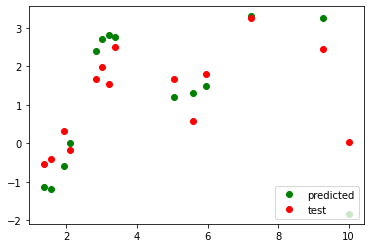

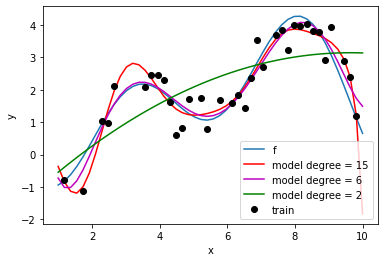

In [8]:
#5 zad

import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
def non_func(x):
 y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
 return y
def add_noise(y):
 np.random.seed(14)
 varNoise = np.max(y) - np.min(y)
 y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
 return y_noisy

x = np.linspace(1,10,50)
y_true = non_func(x)
y_measured = add_noise(y_true)
x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]

# make polynomial features
poly = PolynomialFeatures(degree=15)
poly2 = PolynomialFeatures(degree=6)
poly3 = PolynomialFeatures(degree=2)

xnew = poly.fit_transform(x)
xnew2 = poly2.fit_transform(x)
xnew3 = poly3.fit_transform(x)

np.random.seed(12)
indeksi = np.random.permutation(len(xnew))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew)))+1:len(xnew)]

xtrain = xnew[indeksi_train,]
xtrain2 = xnew2[indeksi_train,]
xtrain3 = xnew3[indeksi_train,]
ytrain = y_measured[indeksi_train]

xtest = xnew[indeksi_test,]
xtest2= xnew2[indeksi_test,]
xtest3 = xnew3[indeksi_test,]
ytest = y_measured[indeksi_test]

linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)

linearModel2 = lm.LinearRegression()
linearModel2.fit(xtrain2,ytrain)

linearModel3 = lm.LinearRegression()
linearModel3.fit(xtrain3,ytrain)

ytest_p = linearModel.predict(xtest)
ytest_p2 = linearModel2.predict(xtest2)
ytest_p3 = linearModel3.predict(xtest3)

MSE_test = [mean_squared_error(ytest, ytest_p),mean_squared_error(ytest,ytest_p2), mean_squared_error(ytest,ytest_p3)]
plt.figure(1)
plt.plot(xtest[:,1],ytest_p,'og',label='predicted')
plt.plot(xtest[:,1],ytest,'or',label='test')

plt.legend(loc = 4)

#pozadinska funkcija vs model
plt.figure(2)
plt.plot(x,y_true,label='f')
plt.plot(x, linearModel.predict(xnew),'r-',label='model degree = 15')
plt.plot(x,linearModel2.predict(xnew2),'m-',label='model degree = 6')
plt.plot(x,linearModel3.predict(xnew3),'g-',label='model degree = 2')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xtrain[:,1],ytrain,'ok',label='train')
plt.legend(loc = 4) 

print(MSE_test)

#Model se bolje poklapa s podacima te se podatke moze tocnije opisati u odnosu na prethodni zadatak

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.30104e-31): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


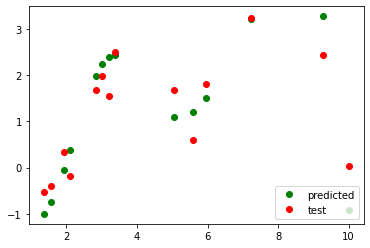

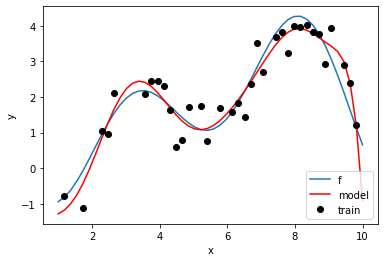

In [15]:
#6 zad

import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
def non_func(x):
 y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
 return y
def add_noise(y):
 np.random.seed(14)
 varNoise = np.max(y) - np.min(y)
 y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
 return y_noisy

x = np.linspace(1,10,50)
y_true = non_func(x)
y_measured = add_noise(y_true)
x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]

# make polynomial features
poly = PolynomialFeatures(degree=15)
xnew = poly.fit_transform(x)

np.random.seed(12)
indeksi = np.random.permutation(len(xnew))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew)))+1:len(xnew)]

xtrain = xnew[indeksi_train,]
ytrain = y_measured[indeksi_train]

xtest = xnew[indeksi_test,]
ytest = y_measured[indeksi_test]

linearModel = lm.Ridge()
linearModel.fit(xtrain,ytrain)

ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)

plt.figure(1)
plt.plot(xtest[:,1],ytest_p,'og',label='predicted')
plt.plot(xtest[:,1],ytest,'or',label='test')
plt.legend(loc = 4)

#pozadinska funkcija vs model
plt.figure(2)
plt.plot(x,y_true,label='f')
plt.plot(x, linearModel.predict(xnew),'r-',label='model')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xtrain[:,1],ytrain,'ok',label='train')
plt.legend(loc = 4)
